In [1]:
# data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# data visualization
from plotly import tools
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [2]:
data_train = pd.read_csv(r'C:\Users\IRINNISAR\Downloads\loan-prediction-problem-dataset\train.csv')
print(np.shape(data_train))

(614, 13)


In [3]:
display(data_train.info(),data_train.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


None

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
data_train.drop(['Loan_ID'], axis=1, inplace=True)

In [5]:
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data_train.describe() #for summary to knows data distribution

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


[[Text(0, 0, 'Yes'), Text(0, 0, 'No')]]

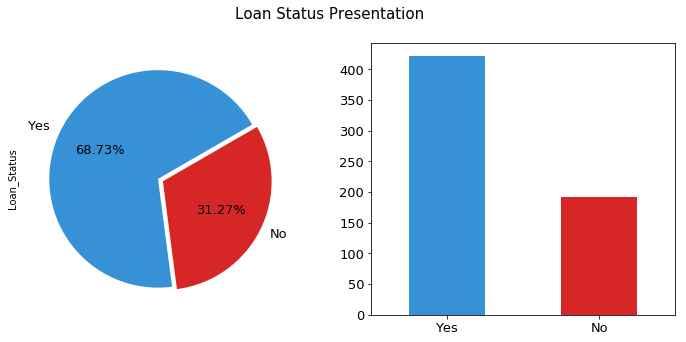

In [7]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

fig.suptitle('Loan Status Presentation', fontsize = 15)
colors = ["#3791D7", "#D72626"]
labels = "Yes", "No"

data_train.Loan_Status.value_counts().plot.pie(explode=[0,0.05], labels=labels, autopct="%1.2f%%", fontsize=13, ax=ax[0], colors=colors, startangle=30)
data_train.Loan_Status.value_counts().plot.bar(ax=ax[1], rot = 0, fontsize=13, color =colors).set(xticklabels = ["Yes", "No"])

<Figure size 432x288 with 0 Axes>

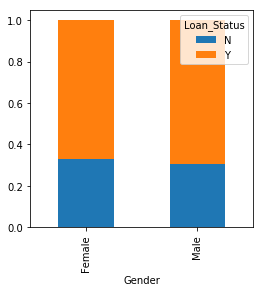

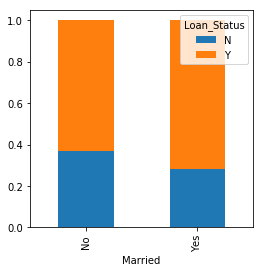

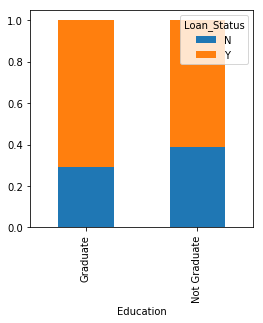

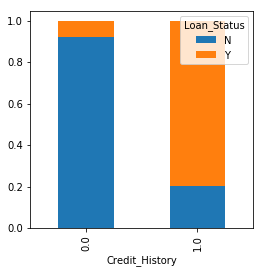

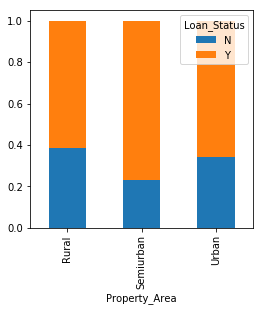

In [8]:
# categorical value and loan status
plt.figure(1)

Gender=pd.crosstab(data_train['Gender'],data_train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Married=pd.crosstab(data_train['Married'],data_train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Education=pd.crosstab(data_train['Education'],data_train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Credit_History=pd.crosstab(data_train['Credit_History'],data_train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

Property_Area=pd.crosstab(data_train['Property_Area'],data_train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

plt.show()

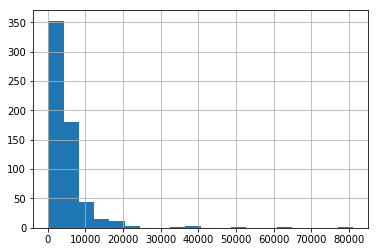

In [9]:
# box plot to know distribution and observe the outliers
data_train['ApplicantIncome'].hist(bins=20)

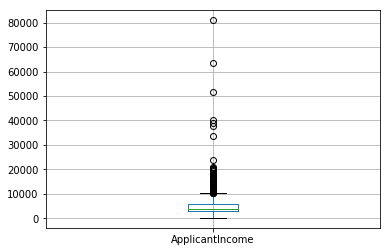

In [10]:
data_train.boxplot(column='ApplicantIncome')

Text(0.5, 0.98, ' ')

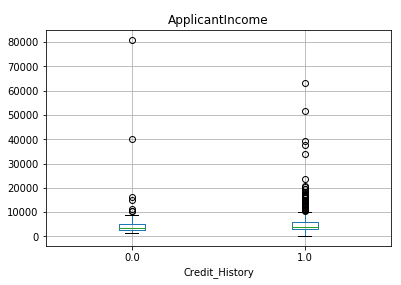

In [11]:
data_train.boxplot(column='ApplicantIncome', by = 'Credit_History')
plt.suptitle(" ")
# doesn't mean high income also have good credit score '1'

Text(0.5, 0.98, ' ')

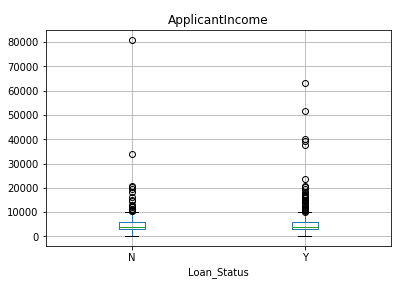

In [12]:
data_train.boxplot(column='ApplicantIncome', by = 'Loan_Status')
plt.suptitle(" ")
# credit score is more trusted than app income in lending club

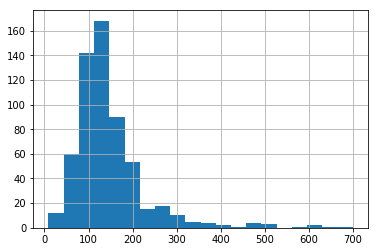

In [13]:
data_train['LoanAmount'].hist(bins=20)

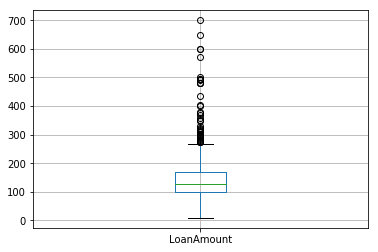

In [14]:
data_train.boxplot(column='LoanAmount')

Text(0.5, 0.98, ' ')

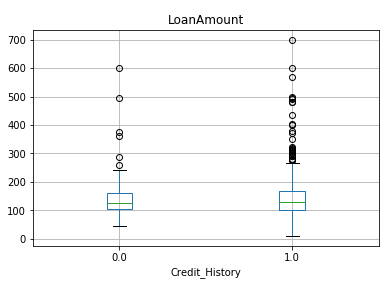

In [15]:
data_train.boxplot(column='LoanAmount', by = 'Credit_History')
plt.suptitle(" ")

Text(0.5, 0.98, ' ')

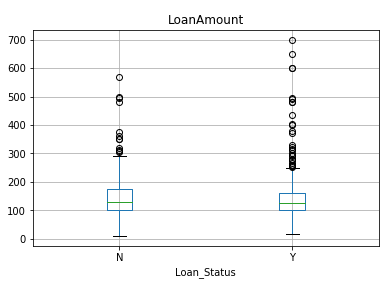

In [16]:
data_train.boxplot(column='LoanAmount', by = 'Loan_Status')
plt.suptitle(" ")

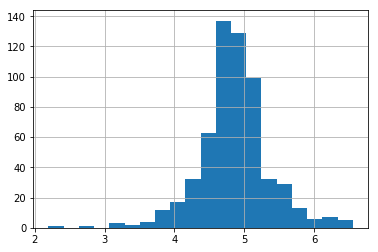

In [17]:
# OUTLIERS OF LOAN AMOUNT AND APPLICANT INCOME
# some people apply for high value due to specific needs, so instead of treating them as outliers, try log transform
# to nullify the effect

data_train['LoanAmount_log']=np.log(data_train['LoanAmount'])
data_train['LoanAmount_log'].hist(bins=20)

In [18]:
data_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [19]:
data_train['Gender'].fillna(data_train['Gender'].mode()[0],inplace=True)
data_train['Married'].fillna(data_train['Married'].mode()[0],inplace=True)
data_train['Dependents'].fillna(data_train['Dependents'].mode()[0],inplace=True)
data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0],inplace=True)
data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0],inplace=True)

data_train['LoanAmount'].fillna(data_train['LoanAmount'].mean(),inplace=True)
data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mean(),inplace=True)
data_train['LoanAmount_log'].fillna(data_train['Loan_Amount_Term'].mean(),inplace=True)

data_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [20]:
#convert all non-numeric to number
categorical = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
for var in categorical:
    le=preprocessing.LabelEncoder()
    data_train[var]=le.fit_transform(data_train[var].astype('str'))
data_train.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
dtype: object

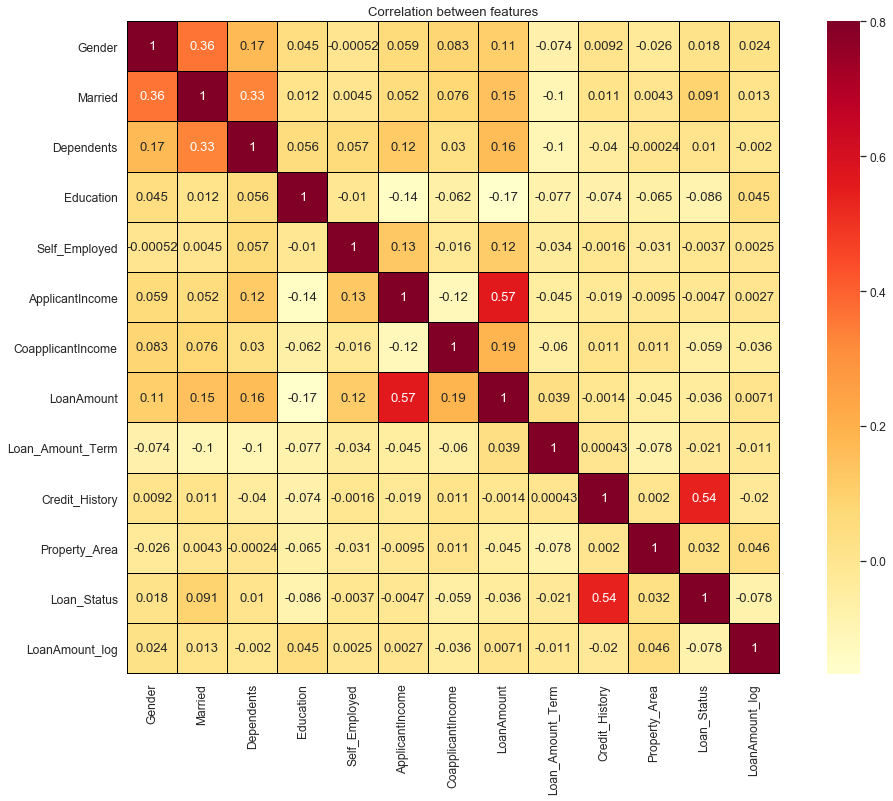

In [21]:
correlation=data_train.corr()

sns.set(font_scale=1.1)
plt.figure(figsize=(17,12))

sns.heatmap(correlation, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='YlOrRd', linecolor="black")
plt.title('Correlation between features');

In [22]:
data_test = pd.read_csv(r'C:\Users\IRINNISAR\Downloads\loan-prediction-problem-dataset\test.csv')

In [23]:
data_test.drop(['Loan_ID'], axis=1, inplace=True)

In [24]:
data_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [25]:
# MODEL BUILDING

# create flag for train and test
data_train['Type']='Train'
data_test['Type']='Test'
data_total=pd.concat([data_train,data_test],axis=0,sort=True)

# Check the available missing values in the dataset again
data_total.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        29
Dependents            10
Education              0
Gender                11
LoanAmount             5
LoanAmount_log       367
Loan_Amount_Term       6
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         23
Type                   0
dtype: int64

In [26]:
# Fill all the missing value in dataset
data_total['Gender'].fillna(data_total['Gender'].mode()[0],inplace=True)
data_total['Dependents'].fillna(data_total['Dependents'].mode()[0],inplace=True)
data_total['Credit_History'].fillna(data_total['Credit_History'].mode()[0],inplace=True)
data_total['Loan_Status'].fillna(data_total['Loan_Status'].mode()[0],inplace=True)
data_total['Self_Employed'].fillna(data_total['Self_Employed'].mode()[0],inplace=True)

data_total['LoanAmount'].fillna(data_total['LoanAmount'].mean(),inplace=True)
data_total['Loan_Amount_Term'].fillna(data_total['Loan_Amount_Term'].mean(),inplace=True)
data_total['LoanAmount_log'].fillna(data_total['LoanAmount_log'].mean(),inplace=True)

data_total.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
Dependents           0
Education            0
Gender               0
LoanAmount           0
LoanAmount_log       0
Loan_Amount_Term     0
Loan_Status          0
Married              0
Property_Area        0
Self_Employed        0
Type                 0
dtype: int64

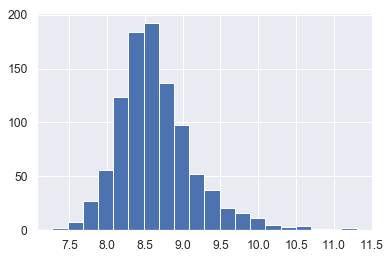

In [27]:
# create a new column as total income
data_total['TotalIncome']=data_total['ApplicantIncome']+data_total['CoapplicantIncome']
data_total['TotalIncome_log']=np.log(data_total['TotalIncome'])

data_total['TotalIncome_log'].hist(bins=20)

In [28]:
#convert all non-numeric to number
categorical = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
for var in categorical:
    le=preprocessing.LabelEncoder()
    data_total[var]=le.fit_transform(data_total[var].astype('str'))
data_total.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History         int32
Dependents             int32
Education              int32
Gender                 int32
LoanAmount           float64
LoanAmount_log       float64
Loan_Amount_Term     float64
Loan_Status            int32
Married                int32
Property_Area          int32
Self_Employed          int32
Type                  object
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [29]:
data_total.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,LoanAmount_log,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,Type,TotalIncome,TotalIncome_log
0,5849,0.0,1,0,0,1,146.412162,342.000000,360.0,1,0,2,0,Train,5849.0,8.674026
1,4583,1508.0,1,1,0,1,128.000000,4.852030,360.0,0,1,0,0,Train,6091.0,8.714568
2,3000,0.0,1,0,0,1,66.000000,4.189655,360.0,1,1,2,1,Train,3000.0,8.006368
3,2583,2358.0,1,0,1,1,120.000000,4.787492,360.0,1,1,2,0,Train,4941.0,8.505323
4,6000,0.0,1,0,0,1,141.000000,4.948760,360.0,1,0,2,0,Train,6000.0,8.699515


In [30]:
data_total.tail()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,LoanAmount_log,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,Type,TotalIncome,TotalIncome_log
362,4009,1777.0,1,4,3,3,113.0,16.937471,360.0,1,3,5,3,Test,5786.0,8.663196
363,4158,709.0,1,0,2,3,115.0,16.937471,360.0,1,3,5,2,Test,4867.0,8.490233
364,3250,1993.0,1,0,2,3,126.0,16.937471,360.0,1,2,4,2,Test,5243.0,8.564649
365,5000,2393.0,1,0,2,3,158.0,16.937471,360.0,1,3,3,2,Test,7393.0,8.908289
366,9200,0.0,1,0,2,3,98.0,16.937471,180.0,1,2,3,3,Test,9200.0,9.126959


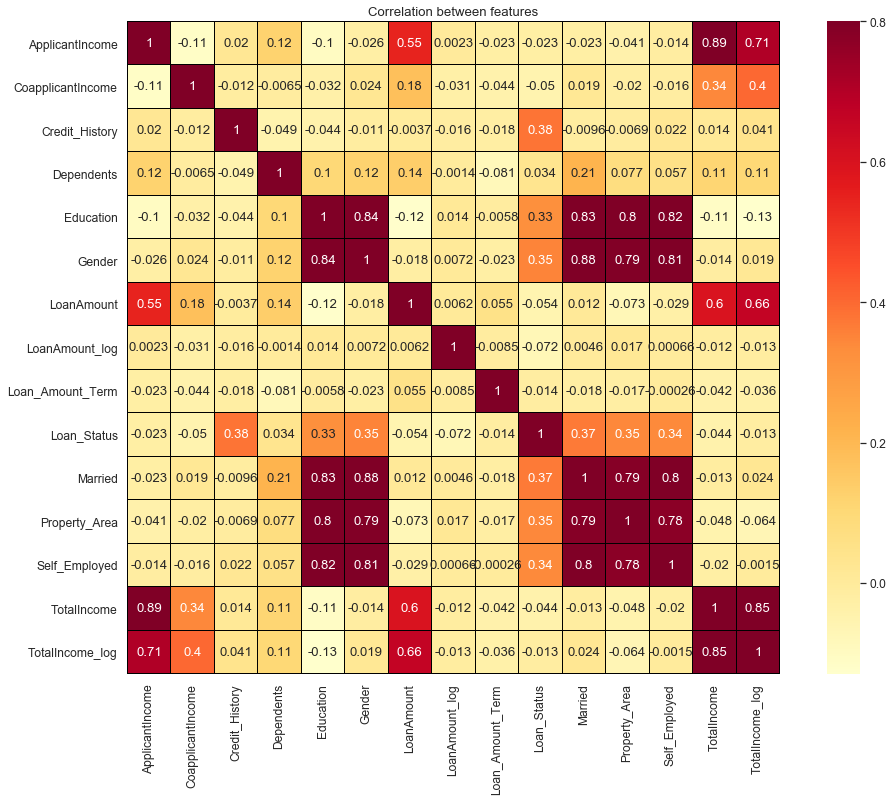

In [31]:
correlation=data_total.corr()

sns.set(font_scale=1.1)
plt.figure(figsize=(17,12))

sns.heatmap(correlation, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='YlOrRd', linecolor="black")
plt.title('Correlation between features');

In [32]:
# GENERIC CLASSIFICATION FUNCTION

#from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Generic function for making classification model and accessing performance

def classifier(model, data, predictors, outcome):
    #fit the model
    model.fit(data[predictors],data[outcome]) 
    
    #make predictions
    predictions=model.predict(data[predictors])  
    
    #accuracy
    accuracy=accuracy_score(data[outcome],predictions) 
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    # cross validation 5 fold
    kf = KFold(n_splits=5)
    error=[]
    
    for train, test in kf.split(data[predictors]):
        #filter training data
        train_predictors=(data[predictors].iloc[train,:])
        
        #target
        train_target=data[outcome].iloc[train]
        
        #training algorithm using predictors and target
        model.fit(train_predictors,train_target)
        
        #record error from each cross validation
        error.append(model.score(data[predictors].iloc[test,:],data[outcome].iloc[test]))
    
    print ("Cross Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    #fit the model again so that it can be refered outside the function
    model.fit(data[predictors],data[outcome])

In [33]:
# Create label encoders for categorical feature
categorical_column = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
for var in categorical_column:
    number = LabelEncoder()
    data_total[var]=number.fit_transform(data_total[var].astype('str'))

train_modified=data_total[data_total['Type']=='Train']
test_modified=data_total[data_total['Type']=='Test']
train_modified["Loan_Status"]=number.fit_transform(train_modified["Loan_Status"].astype('str'))

In [34]:
# LOGISTIC REGRESSION MODEL

# use feature selection based on the correlation

from sklearn.linear_model import LogisticRegression

predictors_logistic=['Credit_History','Education','Gender','Married','Property_Area','Self_Employed']

X_train = train_modified[list(predictors_logistic)].values
y_train = train_modified["Loan_Status"].values
X_test = test_modified[list(predictors_logistic)].values
y_test = test_modified["Loan_Status"].values

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((614, 6), (614,), (367, 6), (367,))

Accuracy : 88.073%
Cross Validation Score : 87.675%


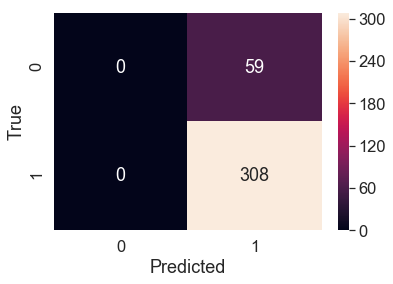

TN:  0
TP:  308
FP:  59
FN:  0
Right classification in test data:  308
Wrong classification in test data:  59


In [35]:
# create log regression object
model = LogisticRegression(solver='lbfgs')

# train the model use training set
model.fit(X_train,y_train)

#predict output
predicted=model.predict(X_test)

outcomes = 'Loan_Status'

classifier(model,data_total,predictors_logistic, outcomes)

sns.set(font_scale=1.5)
confusion = confusion_matrix(predicted, y_test)
sns.heatmap(confusion, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print('TN: ',confusion[0,0])
print('TP: ',confusion[1,1])
print('FP: ',confusion[0,1])
print('FN: ',confusion[1,0])
print('Right classification in test data: ', confusion[1,1]+confusion[0,0])
print('Wrong classification in test data: ', confusion[0,1]+confusion[1,0])

In [ ]:
# TP = true yes pred yes
# TN = true no pred no
# FP = true no pred yes
# FN = true yes pred no